# Sine fit - Nyquist-Shannon with MCU data

In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import triang
import csv
from scipy.optimize import curve_fit

# Variables for directories
DATADIR = "../data-source"
OUTPUTDIR = "./output"

Intervallo di campionamento =  -0.0010000000000000009  secondi


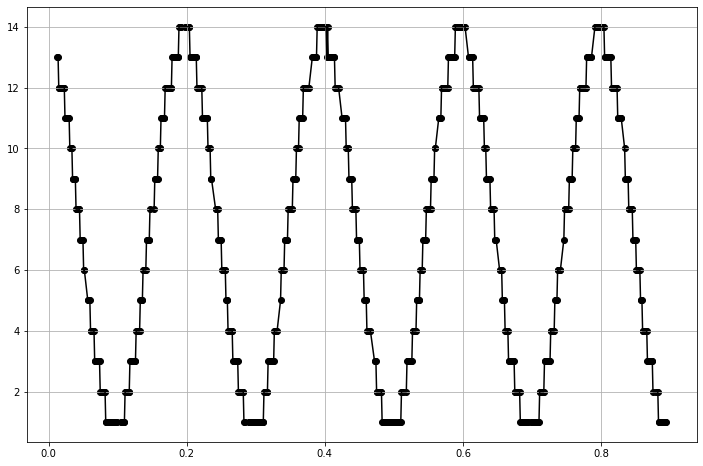

In [63]:
name = 8
file = pd.read_csv(f"../data-source/4-11-21/S{name}.csv")

start = 0
end   = 800

data = file.to_numpy().transpose()
fig, ax = plt.subplots(figsize=(12,8))

xdata = data[0][start:end]
ydata = data[1][start:end]

ax.plot(xdata, ydata, color = "black")
ax.scatter(data[0][start:end], data[1][start:end], color = "black")
ax.grid()
print("Intervallo di campionamento = ", data[0][0] - data[0][1], " secondi")

In [69]:
def func(x, f, p, A, O):
    return A * np.sin(f * 2 * np.pi * x + p) + O


In [121]:
expectedF =5
def nyq_graph(ax, expectedF, xdata, ydata, limit_data):
    #bv = ((5., 2000.), # frequenza
     #     (0., 7.), # fase
      #    (0.1, 5), # Ampiezza
       #   (-3., 0.1)) # Offset

    bv = (
        (4., -3., 7., 0.2),
        (2000., 3.0, 30., 10.)
    )

    #p0=[6., -0. , (max(ydata) - min(ydata)) / 2. + 4, (max(ydata) + min(ydata)) / 2.]
    p0=[expectedF, -0. , (max(ydata) - min(ydata)) / 2. + 4, (max(ydata) + min(ydata)) / 2.]

    #popt, pcov = curve_fit(func, xdata, ydata, p0, bounds= bv)
    popt, pcov = curve_fit(func, xdata, ydata, p0)

    #fig = plt.figure(figsize = (8,6), tight_layout=True)
    #ax = fig.add_subplot(1,1,1)

    ax.scatter(xdata[:limit_data], ydata[:limit_data], color = "black", marker = "s")
    ax.plot(xdata[:limit_data], ydata[:limit_data], color="black", label="dati\nsperimentali")

    ax.plot(xdata[:limit_data], func(xdata[:limit_data], *popt), color = "blue", label="fit", linestyle='-')
    #popt[0] = expectedF

    xrange = np.arange(0, xdata[limit_data-1], 0.001)
    ax.plot(xrange, func(xrange, expectedF, *popt[1:]), color = "red", label="curva\nattesa")

    ax.set(xlabel = "Tempo (s)", ylabel = "Output digitale (decimale)", title = "f = " + str(expectedF) + " Hz")
    ax.grid()
    #ax.legend(bbox_to_anchor=(0.9,0.2))

    #plt.savefig(f"{OUTPUTDIR}/nyquist_mcu_s{name}.pdf")


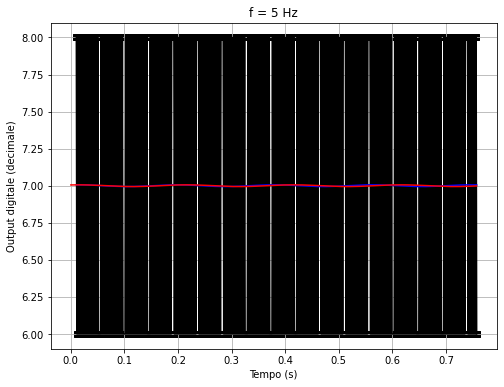

In [122]:
fig, ax = plt.subplots(figsize=(8,6))
nyq_graph(ax, 5, xdata, ydata, 700)

In [123]:
popt[2] = 0.
popt

array([4.99557703, 1.70092917, 0.        , 7.30310748])

In [124]:
print('fit: f=%5.3f, p%5.3f, A=%5.3f, O=%5.3f' % tuple(popt))

fit: f=4.996, p1.701, A=0.000, O=7.303



# Cumulative

In [131]:
cumulative = {
    8: (5, 800),
    9: (10, 300),
    10:(50, 300),
    11:(100, 200),
    12:(130, 200),
    13:(180, 150),
    14:(230, 130),
    15:(270, 100),
    16:(320, 90),
    17:(360, 80),
    18:(400, 70),
    19:(450, 70),
    20:(500, 70),
    21:(600, 70),
    22:(700, 70),
    23:(850, 70),
    24:(1000, 70),
    25:(2000, 70),
}



/usr/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


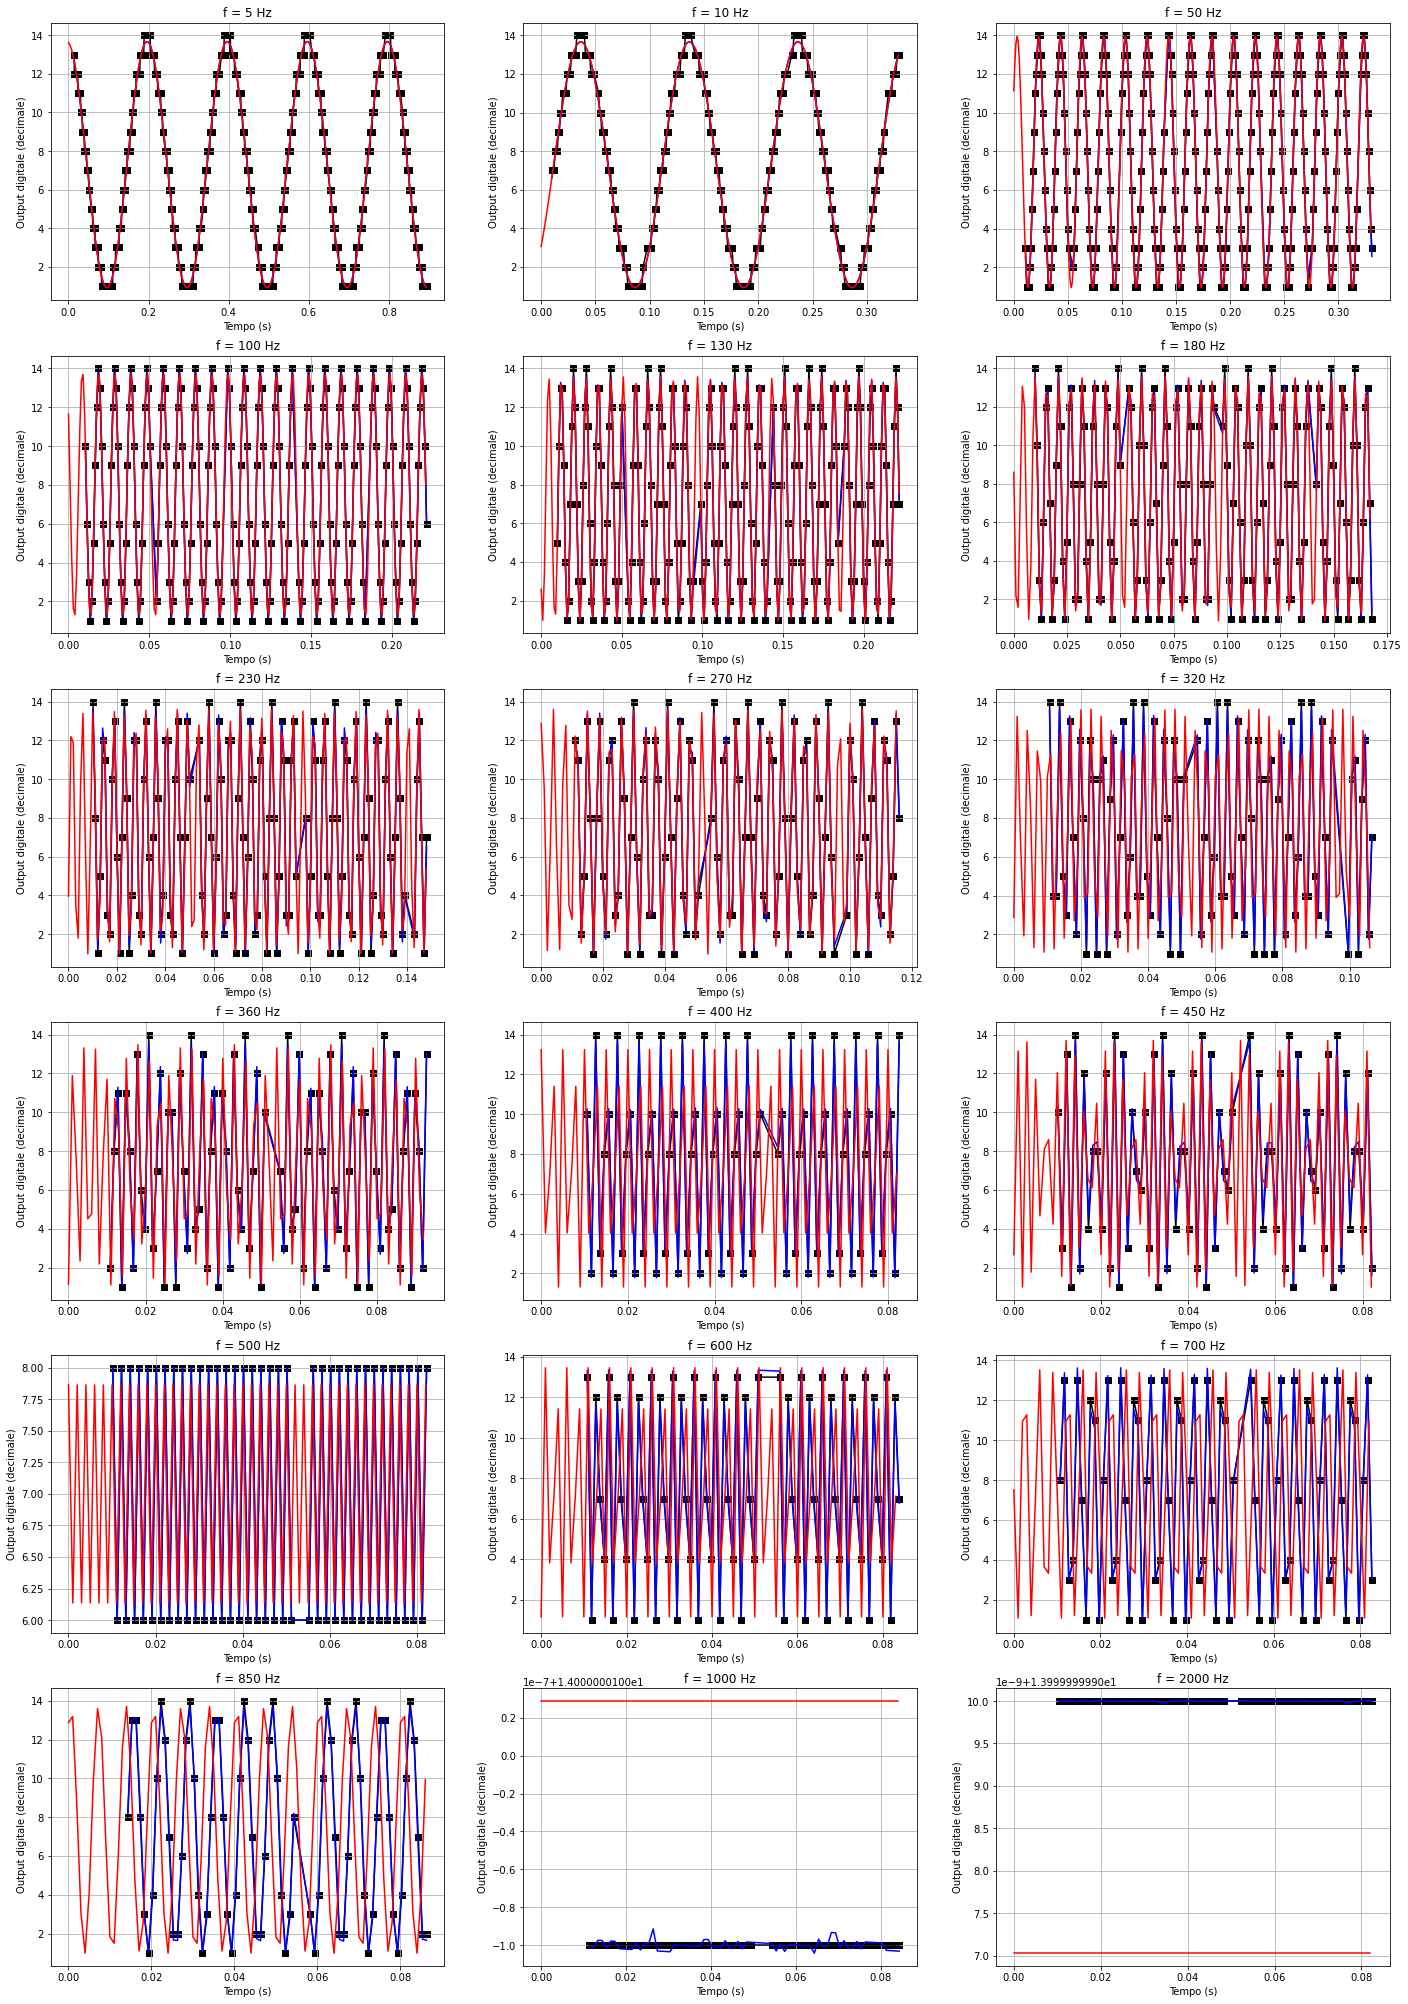

In [133]:
fig = plt.figure(figsize = (24, 48)) # 3x8
for k,v in cumulative.items():
    file = pd.read_csv(f"../data-source/4-11-21/S{k}.csv")

    start = 0
    end   = 800

    data = file.to_numpy().transpose()
    
    xdata = data[0][start:end]
    ydata = data[1][start:end]
    
    ax = fig.add_subplot(8,3, (k-7))
    
    nyq_graph(ax, v[0], xdata, ydata, v[1])
plt.savefig(f"{OUTPUTDIR}/cumulative_nyquist_mcu.pdf")